In [40]:
import pandas as pd
import seaborn as sns
import matplotlib as pyplot
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
import nltk.stem as stem
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim.models import Word2Vec
import gensim
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Data/Data_Train.csv")
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Text variables : Title, sysnopsis

Categorical : Author, genre, bookCategory

composite (categorical) : Edition

real valued: Reviews, ratings

In [3]:
df['Reviews'] = df.Reviews.str.split().str.get(0).astype('float')

In [4]:
df['Ratings'] = df.Ratings.str.split().str.get(0).str.replace(',', '').astype('int32')

In [5]:
df['Edition_type'] = df.Edition.str.split(',').str.get(0)

In [6]:
df['Edition_year'] = df.Edition.str.split().str.get(-1)

In [7]:
df = df.drop(columns=['Edition'])

In [8]:
df.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_type,Edition_year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006


In [9]:
df['Genre'].unique().shape

(345,)

In [10]:
df['BookCategory'].unique().shape

(11,)

In [28]:
df['Author'].unique().shape

(3679,)

In [34]:
# df['Author'].value_counts()

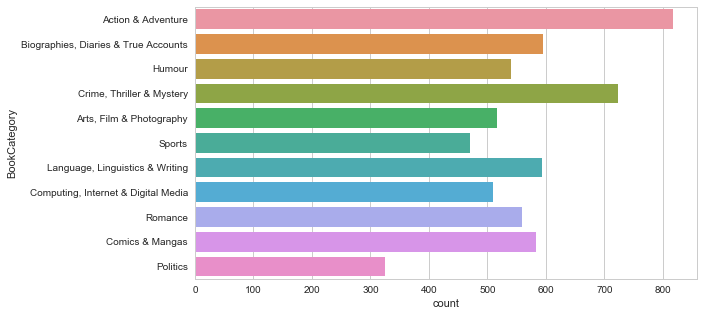

In [18]:
fig, ax = pyplot.pyplot.subplots(figsize=(9,5))
sns.set(style="whitegrid")
sns.countplot(ax=ax, y="BookCategory", data=df)
pyplot.pyplot.show()

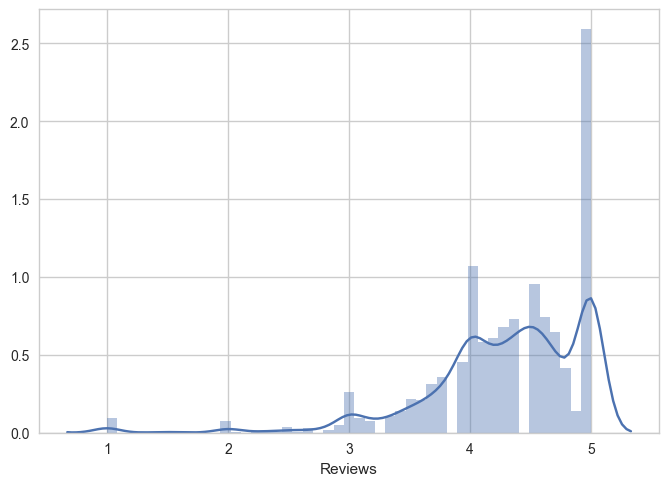

In [153]:
sns.distplot(df['Reviews']);
plt.show()

In [19]:
stemmer = stem.PorterStemmer()
stop_words = stopwords.words('english')

def stem_stop(input_text):

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(input_text.lower())
    tokens = [x for x in tokens if not x in stop_words]
    tokens_stemmed = [stemmer.stem(x) for x in tokens]
    return tokens_stemmed

In [20]:
sentences = list(df['Synopsis'])

In [21]:
sentences = [stem_stop(i) for i in sentences]

In [22]:
model = gensim.models.KeyedVectors.load_word2vec_format('models/GoogleNews-vectors-negative300.bin', binary=True)

In [24]:
def get_mean_vector(word2vec_model, words):
    words = [word for word in words if word in word2vec_model.vocab]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return None

In [96]:
synopsis = np.array([get_mean_vector(model, i) for i in sentences])

In [97]:
synopsis.shape

(6237, 300)

In [74]:
def get_one_hot(data):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(dfs['Genre'])
    enc = OneHotEncoder(handle_unknown='ignore')
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    x = enc.fit_transform(integer_encoded)
    return x

In [85]:
onehot_genre = get_one_hot(df['Genre']).todense()

In [87]:
onehot_book = get_one_hot(df['BookCategory']).todense()

In [88]:
onehot_authot = get_one_hot(df['Author']).todense()

In [89]:
onehot_edition_type = get_one_hot(df['Edition_type']).todense()

In [90]:
onehot_edition_year = get_one_hot(df['Edition_year']).todense()

In [102]:
x = np.concatenate((df[['Ratings', 'Reviews']], onehot_authot, onehot_book, onehot_edition_type, onehot_edition_year, onehot_genre, synopsis), axis=1)

In [103]:
x.shape

(6237, 2027)